## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [171]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [172]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [173]:
df.user_id.size

294478

c. The number of unique users in the dataset.

In [174]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [175]:
df.converted.sum()/df.user_id.nunique()

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [176]:
df[(df['landing_page'] == 'new_page') & (df['group'] != 'treatment')].user_id.count() + df[(df['landing_page'] == 'old_page') & (df['group'] != 'control')].user_id.count()

3893

f. Do any of the rows have missing values?

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [178]:
treatment = df[(df['landing_page'] == 'new_page') & (df['group'] == 'treatment')]
control = df[(df['landing_page'] == 'old_page') & (df['group'] == 'control')]
df2 = treatment
df2 = df2.append(control)
df2.sort_index(inplace=True)

df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [179]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [180]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [181]:
duped = df2.groupby('user_id').count().group.nlargest(1)
duped

user_id
773192    2
Name: group, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [182]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [183]:
df2 = df2.drop([2893])

In [184]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [185]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [186]:
df2[df2['group'] == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [187]:
df2[df2['group'] == 'treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [188]:
df2[df2['landing_page'] == 'new_page'].user_id.count()/df2.user_id.count()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Based on the results above, I do not believe there is sufficient evidence the the new treatment lead to more conversions.

With an equal disbursement of control and treatment users in the data set with a near %50 probability of landing in either group, the treatment group converted %11.88 percent of users, which is lower than the conversions of the control group, which had a %12.03 probability of converting.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{new} - p_{old} <= 0$$

$$H_1: p_{new} - p_{old} > 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [189]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [190]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

In [191]:
df_diff = p_new - p_old
df_diff

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [192]:
n_new = df2[df2['group'] == 'treatment'].user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [193]:
n_old = df2[df2['group'] == 'control'].user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [194]:
new_page_converted = np.random.choice([0,1], size = n_new, p = [1-p_new, p_new])

In [195]:
new_page_converted.mean()

0.11944119468722042

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [196]:
old_page_converted = np.random.choice([0,1], size = n_old, p = [1-p_old, p_old])

In [197]:
old_page_converted.mean()

0.11945014248936492

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [198]:
new_page_converted.mean() - old_page_converted.mean()

-8.947802144498862e-06

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [199]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new 
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old 
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

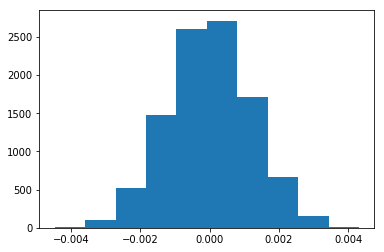

In [200]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [201]:
new_page_con = df2[df2['landing_page'] == 'new_page'].converted.mean()
old_page_con = df2[df2['landing_page'] == 'old_page'].converted.mean()
actuall_diff = new_page_con - old_page_con
actuall_diff

-0.0015782389853555567

In [202]:
(np.array(p_diffs) > actuall_diff).mean()

0.90820000000000001

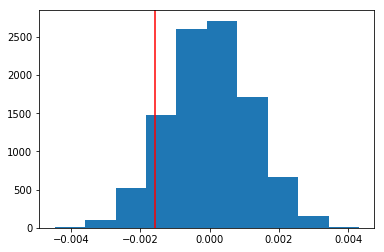

In [203]:
plt.hist(p_diffs)
plt.axvline(x=actuall_diff, color = 'red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

By comparing the difference in possible conversion values for the null hypothesis (p_diff) against the actual conversion values from our data for the new and old pages we establish our p-value. The p-value represents the probability that the results of our observed statistic would be obtained if the null hypothesis was true. For the alternate hypothesis to be true, our p-value would need to be less than our established Type 1 error rate of 5% ( or .05).
Our calculated p-value here is .90, which is far greater than our Type 1 error rate and I would conclude that we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [204]:
import statsmodels.api as sm

convert_old = df2[df2['landing_page'] == 'old_page'].converted.sum()
convert_new = df2[df2['landing_page'] == 'new_page'].converted.sum()
n_old = df2[df2['landing_page'] == 'old_page'].user_id.count()
n_new = df2[df2['landing_page'] == 'new_page'].user_id.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [205]:
zstat, pvalue = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = "smaller")
print(" zstat: ", zstat,"\n","pvalue: ", pvalue)

 zstat:  1.31092419842 
 pvalue:  0.905058312759


In [206]:
from scipy.stats import norm
p = .95
cval = norm.ppf(p)
cval

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The  p-value calculated above (.905) is very close to the previously calculated p-value of (.901).
Furthermore, the calculated z-score of 1.31 is significant since a z-critical value based on a confidence interval of 95% would be 1.64. Since the z-score is less than that, and our p-value is far greater than our type 1 error rate of .05, I would conclude again that we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I will use logistic regression for analysis.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [207]:
df2['intercept'] = 1
df2[['throw_away','ab_page']] = pd.get_dummies(df2['group'])
df2.drop('throw_away', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [208]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [209]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [210]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        14:53:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

 


In the logistic regression model the returned p-value was .190. Our p-value using stats.proportions_ztest in Part II was .905.

The difference in the two p-values is due to the fact that the original calculation in Part II was based on a one-tailed hypothesis where:
$$H_0: p_{new} - p_{old} <= 0$$

$$H_1: p_{new} - p_{old} > 0$$

but in the logistic regression it is assuming a two tailed hypothesis, and is assuming a null and alternative hypothesis where:
$$H_0: p_{new} - p_{old}  =  0$$

$$H_1: p_{new} - p_{old}  !=  0$$

Furthermore, our p-value in Part II covered all areas excluding the negative extreme, whereas the p-value of our logistic regression model in Part III covers area within the negative extreme. To compare values the logistic regression p-value will need to be divided by 2 and subtracted from 1.

In that case:
1 - (.190/2) = 1 - .095 = .905

which is equal to our p-value from Part II

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

The relationship established between landing page and coversion rate alone does not show that there is a significant effect between the two. Adding relevant variables like time on site, duration, gender, age, etc. could influence conversion and give a more detailed view of the conversion rate. It could also clarify whether there are confounding variables that might influence the results and the ability to identify the effects of the landing page on the conversion rate.

However, with additional factors come concerns for issues like collinearity. Having variables that are closely related to each other could show correlation and make it difficult to discern the impact of the predictor variables.
There is also the risk of having variables that are not linearly related. If that was the case, high order terms would need to be considered in distinguising a relationship.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [211]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [212]:
df2 = df2.merge(countries, how='inner', on='user_id')

In [213]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [214]:
df2.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [215]:
df2[['CA','UK','US']] = pd.get_dummies(df2['country'])
df2.drop('US', axis=1, inplace=True)

In [216]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0


In [217]:
print('Conversion rate for all countries is: ',df2.converted.mean())
print('Conversion rate for US is: ',df2[df2['country'] == 'US'].converted.mean())
print('Conversion rate for UK is: ',df2[df2['country'] == 'UK'].converted.mean())
print('Conversion rate for CA is: ',df2[df2['country'] == 'CA'].converted.mean())

Conversion rate for all countries is:  0.119597087245
Conversion rate for US is:  0.119546800642
Conversion rate for UK is:  0.12059448569
Conversion rate for CA is:  0.115318297814


In [218]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'CA']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [219]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:               2.323e-05
Time:                        14:53:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [220]:
df2['ab_UK'] = df2['ab_page'] * df2['UK']
df2['ab_CA'] = df2['ab_page'] * df2['CA']

In [221]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,ab_UK,ab_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,0,0


In [222]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page','ab_UK', 'ab_CA']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 18 Dec 2020   Pseudo R-squ.:               2.323e-05
Time:                        14:53:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

With the addition of country variables into the data there remains to be no significant difference in conversion rate.
Furthermore, the logistic regression model with the additional variables included does not return any p-values less than the type 1 error rate of .05.
Even accounting for interactions between countries and pages, no results have a p-value of .05 or less, indicating that the new page does not play a role based on landing page.

### Conclusion

Throughout this report the conversion of the new landing page has been analyzed in three distinct seperate reviews.

In Part I, once the data was cleaned a comparison of the two pages showed that the those users in the treatment group (users that received the new page) converted a smaller percentage of users than the control group (users that received the old landing page. This analysis did not support the use of the new landing page.

In Part II hypothesis testing was used to compare a null hypothesis and alternative hypothesis to compare conversion rates for the new landing page against a large simulated sampling distribution using the results of all data from the original sample. That plus the results of a normal test for proportions resulted in a p-value far greater than the determined type 1 error rate. These results did not support the use of the new landing page.

In Part III logistic regression was used to examine the sample data which returned p-values consistent with the prior two sections and further reinforced the assertion not to recommend the new landing page.

Furthermore, in Part III the additional variable of country information for each user was added to investigate any possible relationship between conversions and other factors. Even with this new data, there was no significant difference in coversion rate for each country, or when accounting for the relationship between the country and the landing page.

The new landing page failed to convert users visiting the site at a higher rate than the original landing page. Based on these results the recommendation to the e-commerce site would be to keep the old landing page and abandon the new one.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [223]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0